In [1]:
# Load the 'Employee Productivity and Satisfaction HR Data' dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('hr_dashboard_data.csv')

# 1. Distribution of Employee Salary

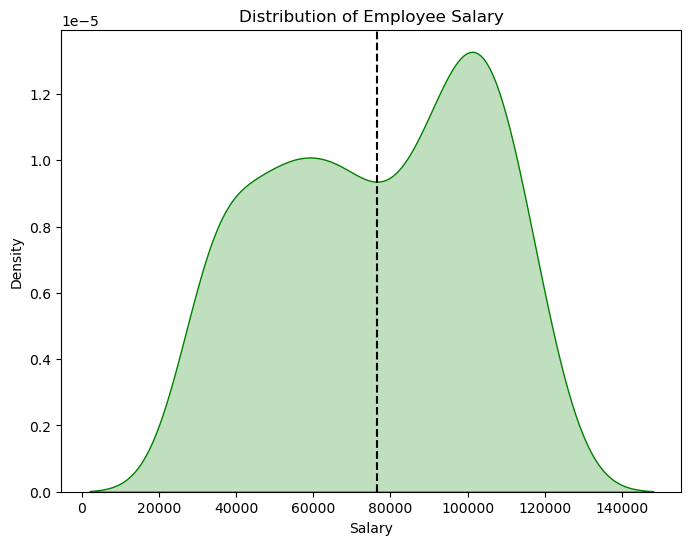

In [2]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(df['Salary'], color='green', ax=ax, shade=True)

# add vertical line at mean
mean = df['Salary'].mean()
ax.axvline(mean, color='black', linestyle='--')

# Add title using ax.set_title()
ax.set_title('Distribution of Employee Salary')

plt.show()

#Bimodularity

In [3]:
df[['Salary']].describe()

,Salary
count,200.000000
mean,76619.245000
std,27082.299202
min,30231.000000
25%,53080.500000
50%,80540.000000
75%,101108.250000
max,119895.000000


Interpretation: The distribution of salary ranges from 30k to 120k. In this KDE graph, bimodularity is observed by two dominant groups: one with a salary range of 40k-60k and the other with a salary range of 100k-120k. There is a dip around the median at 80k between these two groups. This leads to show interesting trends in salary range. It points to speculate and explore what factors can contribute to higher compensations and which features are strongly associated with salary prediction in this data analysis.

# 2. Distribution of Salary by Gender

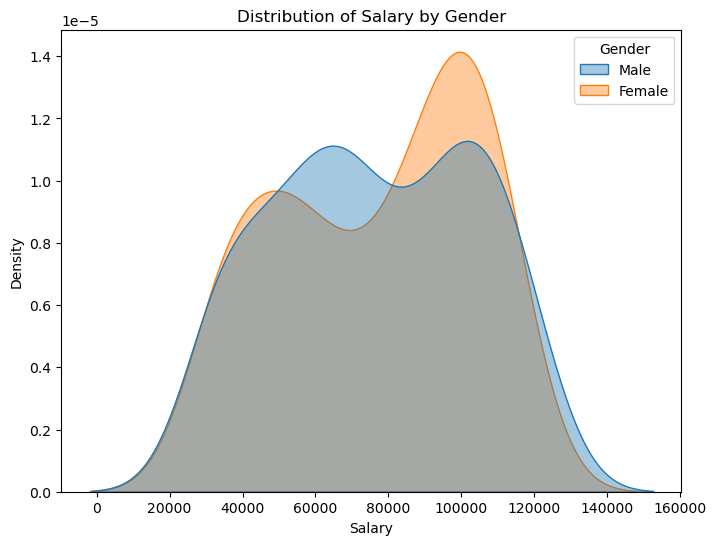

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(data=df, x='Salary', hue='Gender', fill=True, common_norm=False, alpha=0.4)
# Add title using ax.set_title()
ax.set_title('Distribution of Salary by Gender')
plt.show()


In [5]:
df.groupby('Gender')[['Salary']].describe()

Salary                                                                \
        count      mean           std      min      25%      50%        75%   
Gender                                                                        
Female  100.0  76985.22  26924.175539  30231.0  52879.0  82827.5  101134.75   
Male    100.0  76253.27  27370.214572  31230.0  53505.0  72760.0  101108.25   

                  
             max  
Gender            
Female  117458.0  
Male    119895.0

Interpretation: In this dataset of a total of 200 employees, there is an equal representation of males and females. There are 100 males and 100 females. This ensures that recruitment and hiring practices are fair and unbiased. The female salary range across 30k-117k and male salary range across 31k-120k. In this graph, females are slightly dominant in the higher range around 100k+ and males are slightly dominant at 60k+. Overall, the distribution of salary is equivalent with a mean salary at 76k. This concludes to show no gender disparity which entails that there is equal opportunity for compensation and promotions in similar roles and with comparable experience.

# 3. Distribution of Salary by Positions

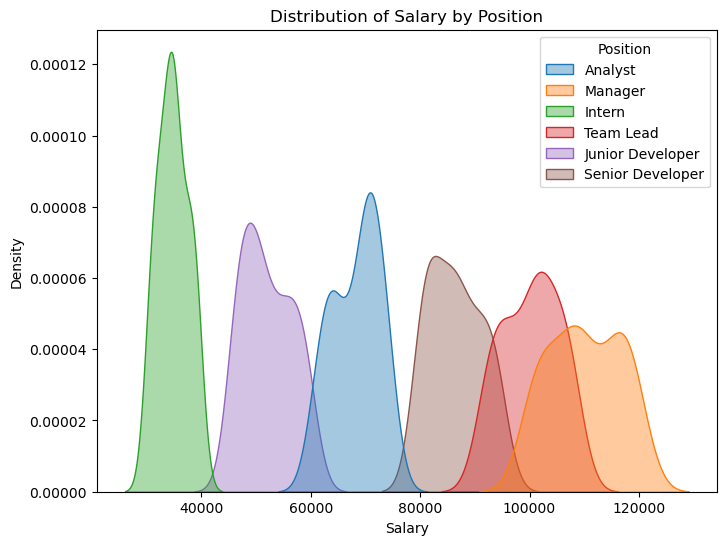

In [6]:
# KDE plot with hues
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(data=df, x='Salary', hue='Position', fill=True, common_norm=False, alpha=0.4)
# Add title using ax.set_title()
ax.set_title('Distribution of Salary by Position')
plt.show()

In [7]:
df.groupby('Position')[['Salary']].describe()

Salary                                                   \
                  count           mean          std       min        25%   
Position                                                                   
Analyst            33.0   68195.696970  4270.181264   60501.0   64328.00   
Intern             30.0   34811.500000  2741.305739   30231.0   32925.25   
Junior Developer   35.0   52104.114286  4474.788728   45375.0   48031.00   
Manager            40.0  110091.475000  6420.306079  100014.0  104214.25   
Senior Developer   30.0   86481.500000  4743.001827   80228.0   81745.50   
Team Lead          32.0  100228.062500  5180.803132   91680.0   95488.50   

                                                 
                       50%        75%       max  
Position                                         
Analyst            69347.0   71558.00   74918.0  
Intern             34649.0   37225.25   39670.0  
Junior Developer   51135.0   56201.50   59877.0  
Manager           109499.5  116147.50  119895.0  
Senior Developer   86411.5   90406.75   94290.0  
Team Lead         100982.5  104323.75  108390.0

Interpretation:The salary distribution by job title is shown with Managers leading the higher-end of compensation range of 100k-120k. Team leads are slightly overlapping with Mangers with a range of 90k-108k. Surprisingly, Senior Developers are not in the 100K group. Their salary ranges from 80K-90K. Below the Senior Developers, the Analysts range across 60k-75k, descending with Junior Developers at the range of 45k-60k. Lastly, the Interns are at the lowest margin of salary at 30-40K. Recalling from the salary distribution with bimodularity shown earlier- Junior Developers are that significant group at 40-60K and Managers are the other dominant group at 100k-120k.

# 4. Distribution of Employees by Position

In [8]:
count_Pos = df['Position'].value_counts().reset_index()
count_Pos.columns=['Position','Number']
count_Pos

,Position,Number
0,Manager,40
1,Junior Developer,35
2,Analyst,33
3,Team Lead,32
4,Intern,30
5,Senior Developer,30


In [9]:
order = count_Pos.groupby("Position")["Number"].mean().sort_values(ascending=False).index

In [10]:
# Create a palette mapping for the unique positions
positions = df['Position'].unique()
palette = dict(zip(positions, sns.color_palette()))

In [11]:
palette

{'Analyst': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'Manager': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Intern': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'Team Lead': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'Junior Developer': (0.5803921568627451,
  0.403921568627451,
  0.7411764705882353),
 'Senior Developer': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354)}

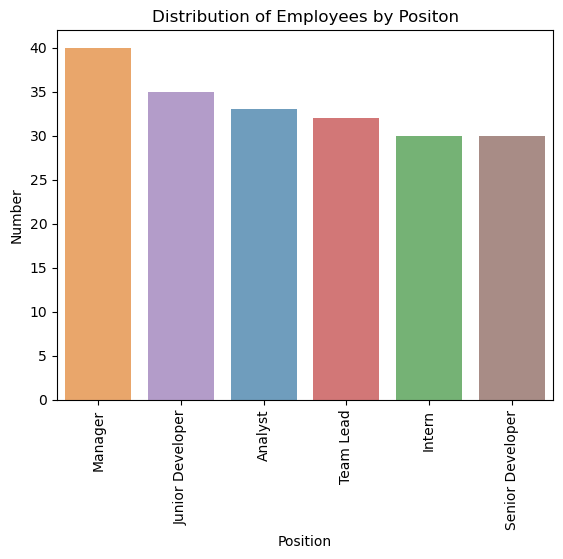

In [12]:
sns.barplot(data=count_Pos, x='Position', y='Number', order=order, palette=palette, ci=None, alpha=0.7)
plt.xticks(rotation=90)
# Add title to the plot
plt.title('Distribution of Employees by Positon')
plt.show()

Interpretation: The bar plot shows the number of employees in each position with Mangers leading with 40 employees followed by Junior Developers at 35. The rest of the positions are roughly about the same number of employees in the 30+ range. The distribution of employees indicates that Managers have a higher representation and holds higher-end compensations in this company which concludes to say that the top ten percentile are all Managers. Interestingly, Team Leads and Senior Developers do not make it to the top ten percentile. 

# 5. Distribution of Top Ten Percentile Salary by Department

In [13]:
top_ten_quan = df.Salary.quantile(0.9)
dfTopTen = df[df['Salary'] > top_ten_quan]
dfTopTen

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
15,Melissa Galvan,40,Male,17,3,53,1.8,Sales,Manager,Jan-13,118466
27,Susan Johnson,35,Male,17,26,81,3.9,Finance,Manager,Jan-11,119895
55,Harold Nguyen,38,Male,22,37,95,2.2,Finance,Manager,Jan-10,116888
78,Daniel Mata,51,Male,25,47,1,3.8,IT,Manager,Jan-07,119208
80,Sarah Fernandez,57,Female,23,84,8,1.9,HR,Manager,Jan-06,115901
84,Mark Wilson,57,Female,23,2,94,3.7,Sales,Manager,Jan-99,111381
96,Amy Carr,51,Female,24,75,37,4.9,Finance,Manager,Jan-08,114384
114,Kathleen May,55,Female,19,41,87,3.1,Sales,Manager,Jan-10,110104
121,Johnathan Williams,44,Female,21,23,40,3.0,Finance,Manager,Jan-10,109581


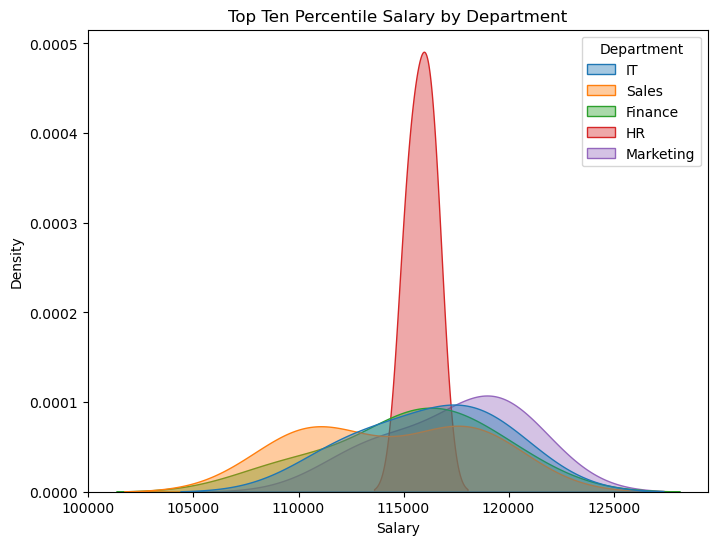

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(data=dfTopTen, x='Salary', hue='Department', fill=True, common_norm=False, alpha=0.4)
# Add title using ax.set_title()
ax.set_title('Top Ten Percentile Salary by Department')
plt.show()

In [15]:
dfTopTen.groupby('Department')[['Salary']].describe()

Salary                                                            \
            count           mean          std       min       25%       50%   
Department                                                                    
Finance       5.0  115357.400000  3798.402072  109581.0  114384.0  116039.0   
HR            3.0  115848.000000   653.114844  115170.0  115535.5  115901.0   
IT            3.0  116225.333333  3389.079718  112540.0  114734.0  116928.0   
Marketing     3.0  117456.000000  3247.888699  113716.0  116400.5  119085.0   
Sales         6.0  114330.166667  4007.864240  110104.0  110811.0  114419.5   

                                 
                  75%       max  
Department                       
Finance     116888.00  119895.0  
HR          116187.00  116473.0  
IT          118068.00  119208.0  
Marketing   119326.00  119567.0  
Sales       117827.75  118466.0

Interpretation: The top ten percentile consists of 20 Managers across five departments. The distribution of salary by department shows five in Finance, three in Marketing, three in IT, and six in Sales having the highest salary at the maximum at 118k-119k. Three employees in HR salary's distribution is clustered tightly with a mean salary at 116K. HR department has consistent pay structure whereas the other departments compensations are more spread out.

# 6. Relationship Between Salary and Project Completed

<AxesSubplot:title={'center':'Project Completed vs. Salary'}, xlabel='Projects Completed', ylabel='Salary'>

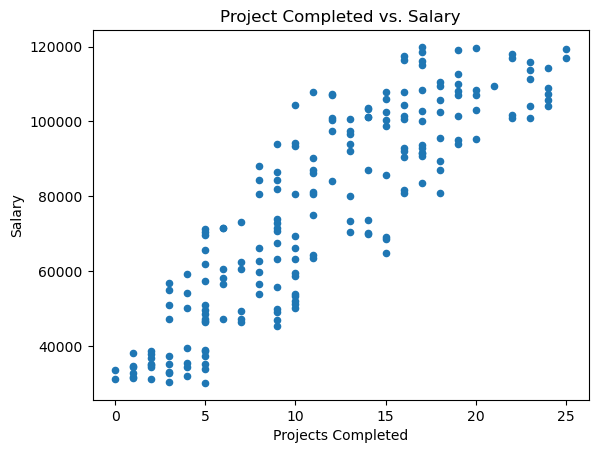

In [16]:
df.plot.scatter(x='Projects Completed', y='Salary', title = 'Project Completed vs. Salary')

In [17]:
df.groupby('Position')[['Projects Completed']].describe()


Projects Completed                                          \
                              count       mean       std   min    25%   50%   
Position                                                                      
Analyst                        33.0   9.393939  3.287661   5.0   7.00   9.0   
Intern                         30.0   2.700000  1.600646   0.0   1.25   2.5   
Junior Developer               35.0   6.771429  2.462492   3.0   5.00   7.0   
Manager                        40.0  19.975000  3.109023  15.0  17.00  19.5   
Senior Developer               30.0  12.833333  3.553370   8.0  10.00  11.5   
Team Lead                      32.0  14.968750  2.788043  10.0  13.00  14.5   

                              
                   75%   max  
Position                      
Analyst           11.0  15.0  
Intern             4.0   5.0  
Junior Developer   9.0  10.0  
Manager           23.0  25.0  
Senior Developer  16.0  18.0  
Team Lead         17.0  20.0

In [18]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['Salary'], df['Projects Completed'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: 0.8743285580969165, P-value: 4.434734277924647e-64


Interpretation: The scatter plot shows a strong positive correlation of 0.87 between salary and projects completed. This could possibly link to performance-based compensation where employees' performance is rewarded for completing projects. If this is the case, then this can motivate employees to work harder and strive for excellence when they know their efforts will be rewarded. It will be interesting to see how employees' productivity rate (%) and satisfactory rate (%) are related and how it impacts salary.